


___
# Ciência dos Dados - PROJETO 1

## Roberto Franco
___

## Análise de interferência da renda na utilização da internet 

___
## Introdução

Análise da interferência da renda no acesso e utilização dos serviços de internet por meio de dados referentes ao acesso à Internet realizado dos seguintes modos: internet em domicio, internet via 3G,  através de conexão discada por linha telefônica e internet via banda larga.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
D:\betof\Documents\ciencia dos dados\GIT\Ciencia_dos_dados


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
dados_2013 = pd.read_excel('DOM_2013.xlsx') # lendo a planilha

DR_2013 = dados_2013.loc[3:,["Column3","Column29","Column50","Column56","Column57","Column58","Column78"]] # escolhendo as colunas

In [6]:
DR_2013.Column3 = DR_2013.Column3.astype('category')
DR_2013.Column29 = DR_2013.Column29.astype('category')
DR_2013.Column50 = DR_2013.Column50.astype('category')
DR_2013.Column56 = DR_2013.Column56.astype('category')
DR_2013.Column57 = DR_2013.Column57.astype('category')
DR_2013.Column58 = DR_2013.Column58.astype('category')
DR_2013.Column78 = DR_2013.Column78.astype('float')

DR_2013.columns = ["UF", "CELULAR", "NET_DOM", "NET_3G","NET_TEL","NET_BL","RENDA"] # alterando os nomes das colunas

# alterando as variaveis: 
DR_2013.CELULAR.cat.categories = (['Sim', 'Nao'])
DR_2013.NET_DOM.cat.categories = (["Sim","Nao"])
DR_2013.NET_3G.cat.categories = (["Sim","Nao"])
DR_2013.NET_TEL.cat.categories = (["Sim","Nao"])
DR_2013.NET_BL.cat.categories = (["Sim","Nao"])

DR_2013.to_csv("Dados_resumidos_2013") # salvar no excel
DR_2013 = DR_2013[DR_2013.RENDA!=999999999999] # tirando os dados invalidos (9999999999)
#DR_2013

AttributeError: 'DataFrame' object has no attribute 'Column3'

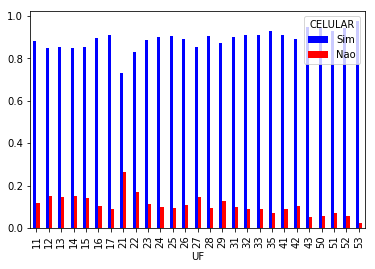

In [29]:
ct_celular_por= pd.crosstab(DR_2013.UF, DR_2013.CELULAR,normalize="index") # porcentagem  de celulares por estado 

ct_celular_por.plot(kind='bar', color=('blue', 'red'),legend=True) # em porcentagem por estado


In [8]:
DF_NET = DR_2013.loc[3:,["NET_DOM","NET_3G"]]

In [65]:
#DF_NET

ct_1= pd.crosstab(DF_NET.NET_DOM, DF_NET.NET_3G,normalize="index")

ct_1.plot(kind='pie',autopct = '%0.2f') # em porcentagem 

ValueError: pie requires either y column or 'subplots=True'

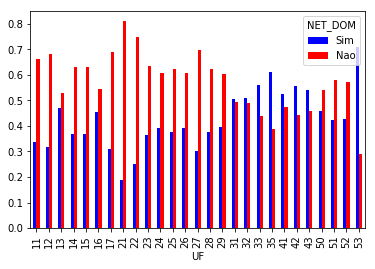

In [9]:
ct_net_dom_por= pd.crosstab(DR_2013.UF, DR_2013.NET_DOM,normalize="index") # porcentagem por estado 

ct_net_dom_por.plot(kind='bar', color=('blue', 'red'),legend=True) # em porcentagem 

In [10]:
DR_2013.RENDA.describe()
#faixa = range(0,82000,1000)
faixa = [0, 500, 1000, 2000,3000,5000, 10000, 20000, 82000] # FAZER POR SALARIO - CLASSE SALARIAL

faixa_classes = [162,291,441,641,1019,2480,82000] # segundo G1: http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html
RENDA_cat = pd.cut(DR_2013.RENDA, bins=faixa)
RENDA_cat_classes = pd.cut(DR_2013.RENDA, bins=faixa_classes)

RENDA_FAIXA = RENDA_cat.value_counts()
RENDA_FAIXA_CLASSES = RENDA_cat_classes.value_counts()

DR_2013["FAIXA_RENDA"] = RENDA_cat # criando uma nova coluna
DR_2013["FAIXA_RENDA_CLASSES"] = RENDA_cat_classes # criando uma nova coluna 

DR_2013.FAIXA_RENDA_CLASSES.cat.categories = (['vuneravel', 'baixa classe M', 'media classe M','alta classe M','baixa classe A','alta classe A'])



In [11]:
# porcentagem de pessoas que possuem as variáveis, por faixas de renda

ct_renda_net = pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.NET_DOM,normalize="index")*100

ct_renda_3G = pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.NET_3G,normalize="index")*100

ct_renda_celular= pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.CELULAR,normalize="index")*100

ct_renda_net_tel = pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.NET_TEL,normalize="index")*100

ct_renda_net_bl = pd.crosstab(DR_2013.FAIXA_RENDA, DR_2013.NET_BL,normalize="index")*100


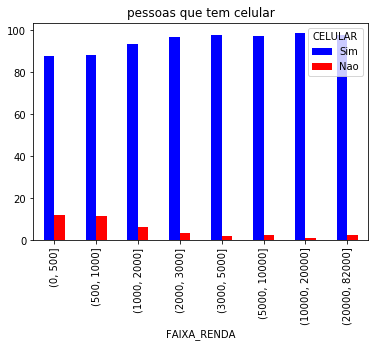

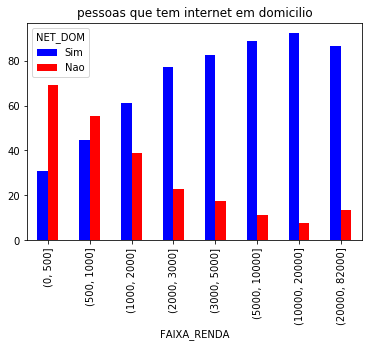

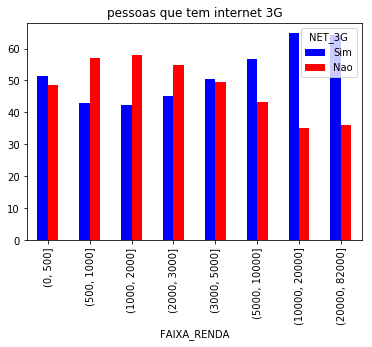

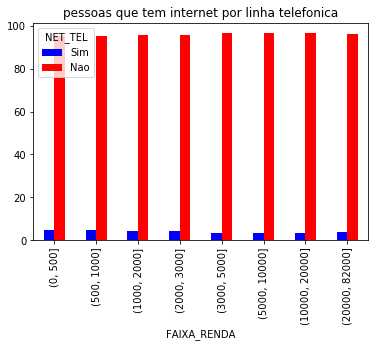

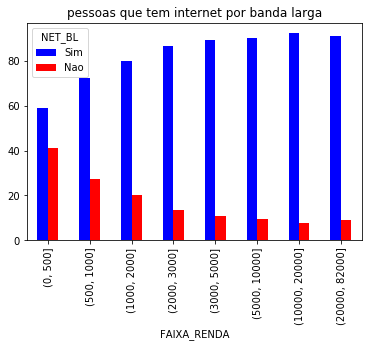

In [73]:
ct_renda_celular.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem celular')
plt.show()
ct_renda_net.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio')
plt.show()
ct_renda_3G.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G')
plt.show()
ct_renda_net_tel.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet por linha telefonica')
plt.show()
ct_renda_net_bl.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem internet por banda larga')

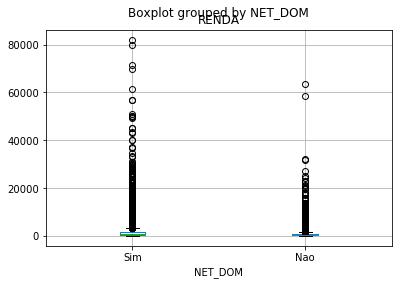

In [64]:
DR_2013.boxplot(column = "RENDA", by = "NET_DOM")

In [17]:
DF = DR_2013[DR_2013.NET_DOM == 'Sim'].iloc[:,3:6]


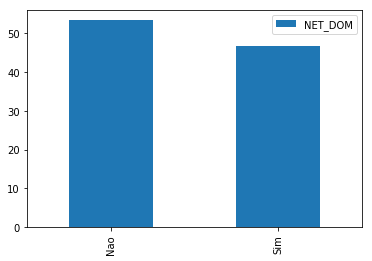

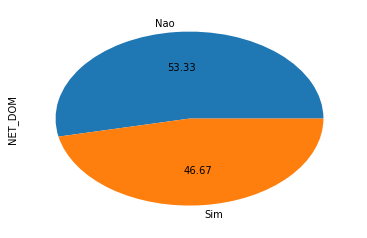

In [66]:
PND = DR_2013.NET_DOM.value_counts(normalize = True)*100

PND.plot(kind='bar',legend=True)
plt.show()

PND.plot(kind='pie',autopct = '%0.2f') # em porcentagem

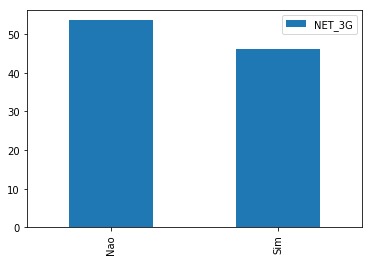

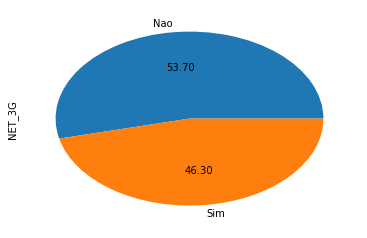

In [69]:
PN_3G = DR_2013.NET_3G.value_counts(normalize = True)*100

PN_3G.plot(kind='bar',legend=True)

plt.show()

PN_3G.plot(kind='pie',autopct = '%0.2f') # em porcentagem

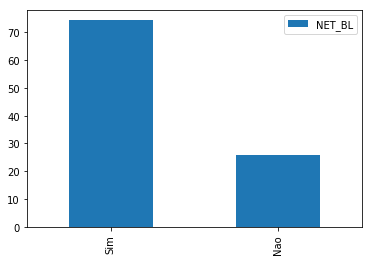

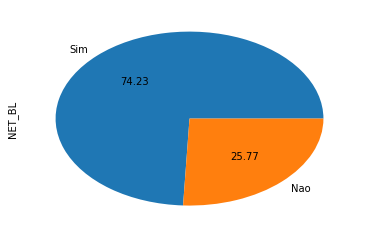

In [71]:
PN_BL = DR_2013.NET_BL.value_counts(normalize = True)*100
PN_BL.plot(kind="bar",legend = True)

plt.show()

PN_BL.plot(kind='pie',autopct = '%0.2f') # em porcentagem
# considerando que acesso via banda larga é um dos que tipos de transimissão  que compõe o acesso a internet em domicilio 

In [19]:
ct_net2 = pd.crosstab(DR_2013.NET_DOM, DR_2013.NET_TEL,normalize="index")*100
ct_net2

NET_TEL,Sim,Nao
NET_DOM,,
Sim,4.554517,95.445483
Nao,0.000000,0.000000


In [20]:
ct_net3 = pd.crosstab(DR_2013.NET_DOM, DR_2013.NET_3G,normalize="index")*100
ct_net3

NET_3G,Sim,Nao
NET_DOM,,
Sim,46.301996,53.698004
Nao,0.000000,0.000000


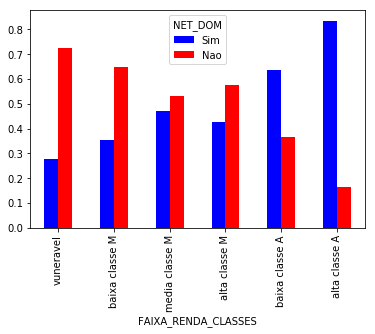

In [21]:
ct_renda_net_por_classes = pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.NET_DOM,normalize="index")  # porcentagem de pessoas que possuem internet em domicilio, por faixas de renda
ct_renda_net_por_classes.plot(kind='bar', color=('blue', 'red'),legend=True) # por classes

In [22]:
dfsim = pd.DataFrame(DR_2013[DR_2013.NET_DOM == "Sim"].iloc[:,-2])
dfnao = pd.DataFrame(DR_2013[DR_2013.NET_DOM == "Nao"].iloc[:,-2])
#dfsim

In [23]:
#grafico = dfsim.plot(kind="hist")
#plotnao = dfnao.plot(kind="hist") #ax=grafico)

In [24]:
# HISTOGRAMA

#ct_renda_net.plot(kind='hist', color=('blue', 'red'),legend=True)

ct_NR = pd.crosstab(RENDA_cat, DR_2013.NET_DOM)


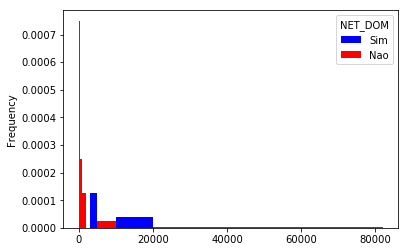

In [25]:
ct_NR.plot(kind='hist', color=('blue', 'red'),legend=True,bins = faixa, normed = True)

___
## Conclusão 

Descreva aqui suas conclusões!